# Raster Data Processing Using Python

# Raster Data

Raster data represent objects/variables on ther Earth's surface as a matrix of values, in the form of  pixels, cells, or grids


<b> Layers and bands 
    
A raster is an image with the matrix of values representing the values of some observed attribute.. Bands of a raster correspond to different variables, usually using the same matirx structure.

Example: Spatial variability of tempreture , elevation, rainfall, etc. over a region.

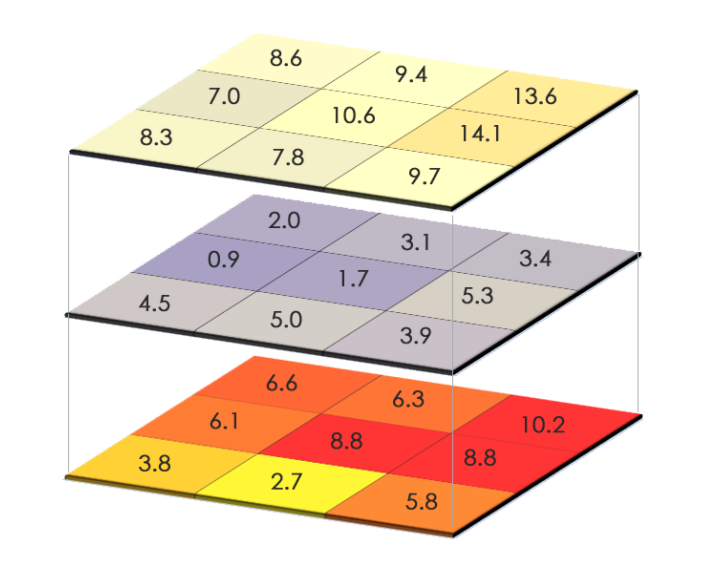

Source:  https://gisgeography.com/spatial-data-types-vector-raster

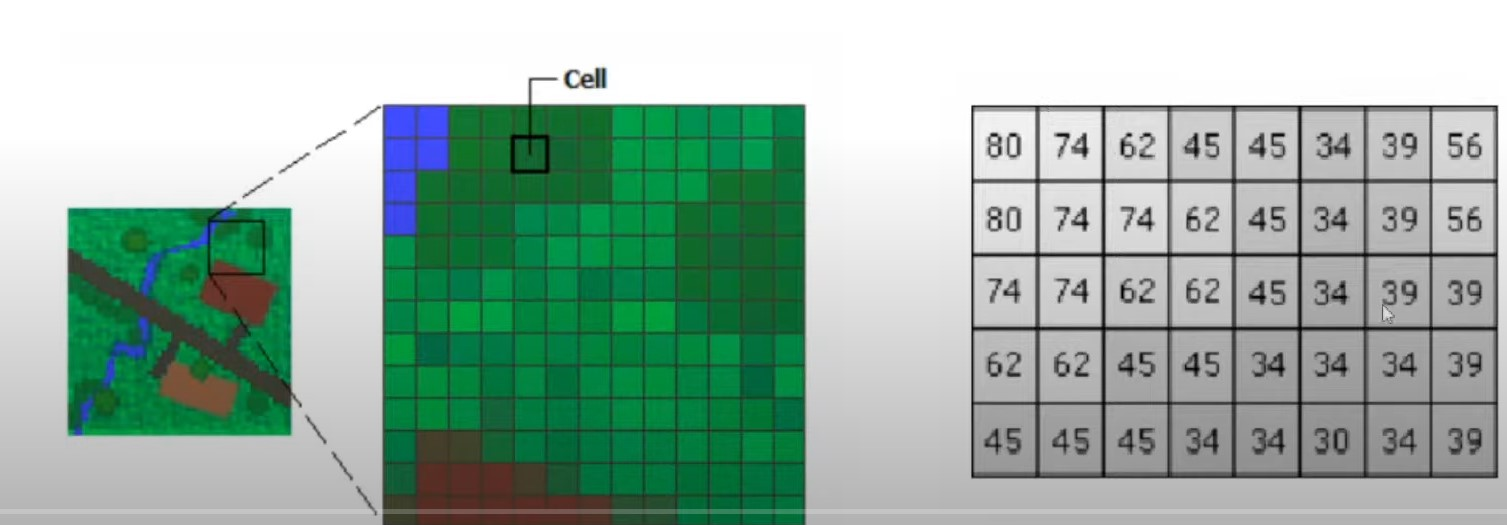

# Raster Bands

Some rasters have a single band, of data, while others have the multiple bands. Basically, a band is represented by a single matrix of cell values, and a raster with multiple bands contains multiple spatiallly coincident matrices of a cell values representing the same spatial area. An example of a singel-band raster dataset is a digital elevation model(DEM). Each cell is a DEM contains only one value representing surface elevation.

# Single band raster

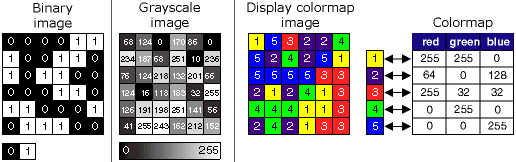

# Multi band raster

A setellite image , for example, commonly has multiple bands representing different wavelengths from the ultravoilet throught the visible and infrade portions of the electromagnetic spectrum.

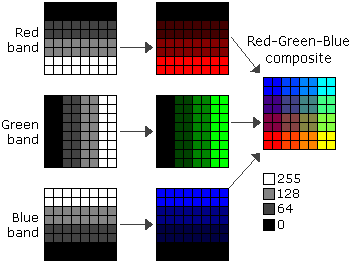

Image credits
- Google Earth Engine https://earthengine.google.com/
- ARC GIS https://pro.arcgis.com/ Geoprocessing with Python by Chris Garrad https://www.manning.com/books/geoprocessing-with-python

# Introduction to GDAL

The geospatial Data Abstraction Library is a computer software library for reading and writing raster and vector geospatial data format.



# Advantage of GDAL.

- Free and open source(https://github.com/OSGeo/gdal)
- Support over 80+ image formats and map projections.
- Commnand line as well as C/C++/Python/R/Java API.
- Used extensively by worlds large geospatial data services.
- Extensive test suite and active developer community.
- GDAL also includes extensive support for vector datasets.



# GDAL Raster Data Model

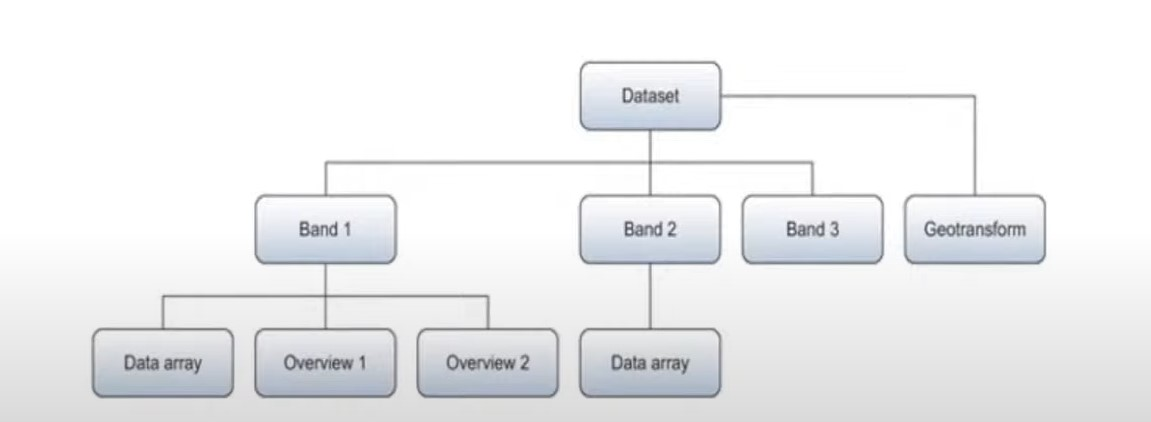

# Map Projection

A map projection is a way to flatten a earth's surface into a plane in order to make a map. This requries a systematic transformation of the latitudes and longtitudes of locations from the surface of the globe into locations on a plane. All projections of a sphere on a plane necessarily distort the surface in some way and to some extent.

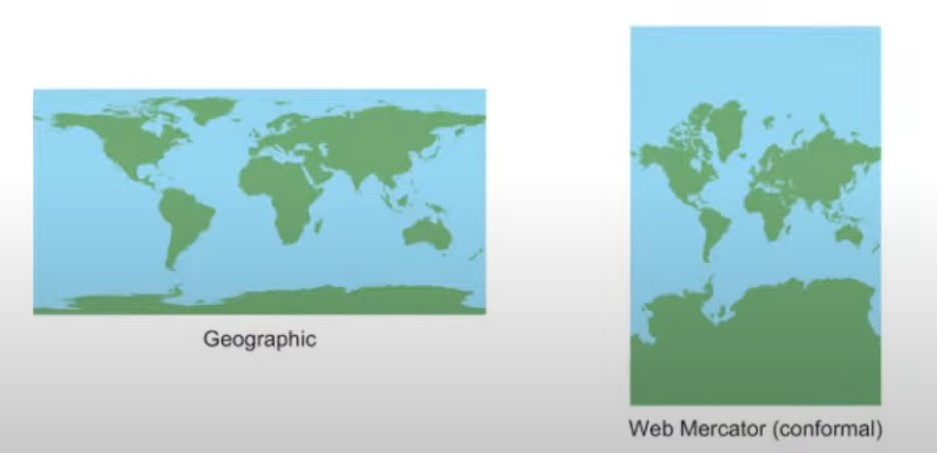

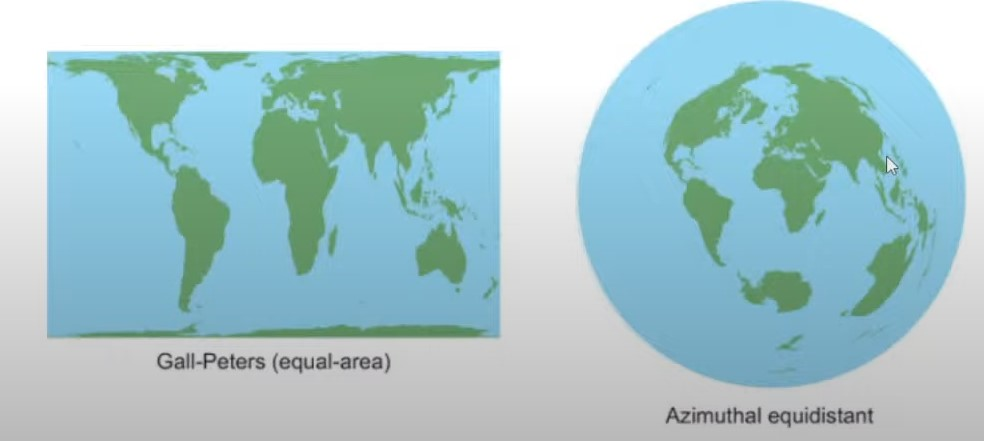

# Cordinate System

There are numerous conventions use globally for representing the coordinate system for map data

1. PROJ4- https://proj4.org/usage/projections.html
2. OGC WKT (defacto standard)- http://docs.opengeospatial.org/is/12-063r5/12-063r5.html
3. EPSG codes(Easy to use)- http://spatialreference.org/ref/epsg/
4. XML etc.

# Cordinate of image

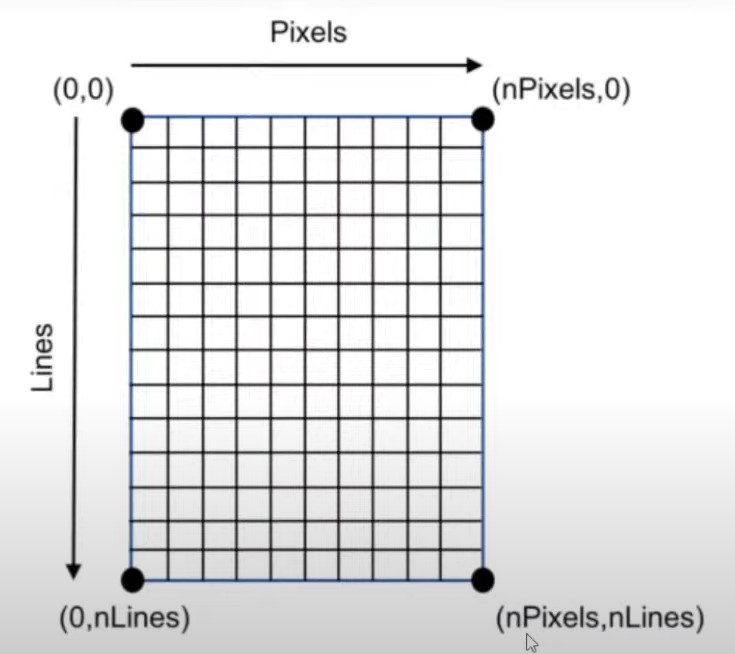

# Pixel Line to Real Coordinate

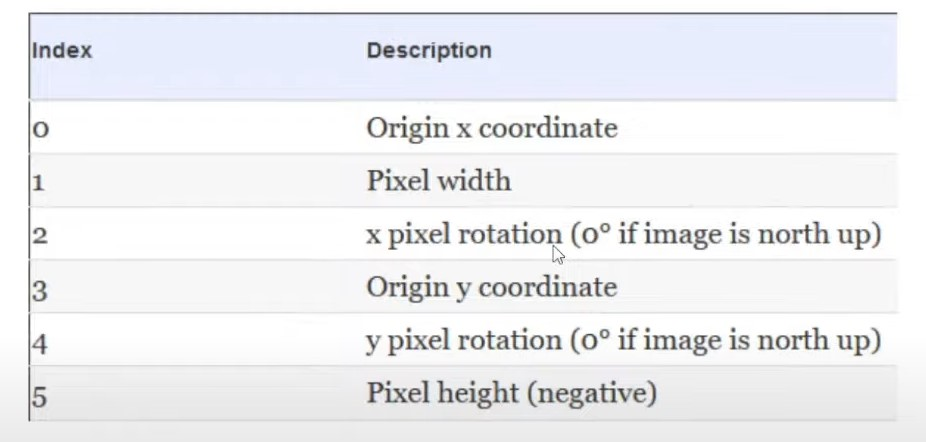

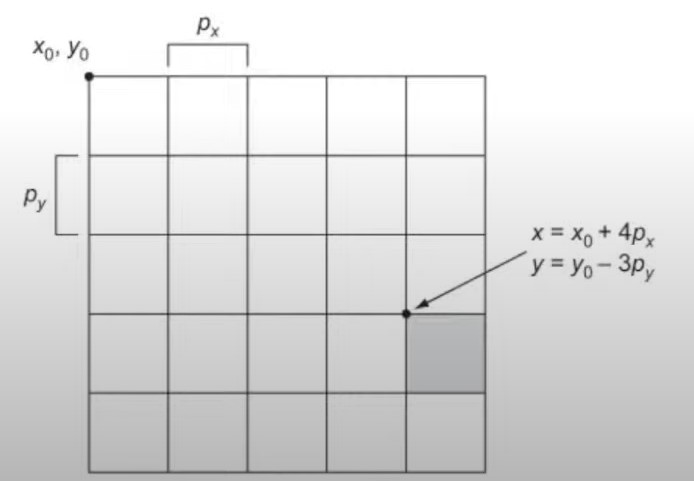

In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from osgeo import osr
import math
import os 

In [2]:
# if u get error proj.db then find location of proj.db in your OS and change path below and run the commands
os.environ['PROJ_LIB'] = 'C:\\Users\\DELL\\anaconda3\\Library\\share\\proj'
os.environ['GDAL_DATA'] = 'C:\\Users\\DELL\\anaconda3\\Library\\share'

Install gdal using Anaconda CLI command `conda install gdal`

# Getting Raster Information with Python

In [3]:
base_dir =  r'G:\iirs\bhuvan'

In [4]:
os.chdir(base_dir)

In [5]:
file_name = r'image1.tif'

In [6]:
ds = gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000204FD598600> >

In [7]:
!gdalinfo -nomd image1.tif

Driver: GTiff/GeoTIFF
Files: image1.tif
       image1.tif.aux.xml
Size is 2262, 2262
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (82.991000000000000,27.009000000000000)
Pixel Size = (0.000450044208665,-0.000450044208665)
Corner Coordinates:
Upper Left  (  82.9910000,  27.0090000) ( 82d59'27.60"E, 27d 0'32.40"N)
Lower Left  (  82.9910000,  25.9910000) ( 82d59'27.60"E, 25d59'27.60"N)
Upper Right (  84.0090000,  27.0090000) ( 84d 0'32.40"E, 27d 0'32.40"N)
Lower Right (  84.0090000,  25.9910000) ( 84d

In [8]:
print('File list:', ds.GetFileList())

File list: ['image1.tif', 'image1.tif.aux.xml']


In [9]:
print('Width:', ds.RasterXSize)

Width: 2262


In [10]:
print('Height:', ds.RasterYSize)

Height: 2262


In [11]:
print('Coordinate system:', ds.GetProjection())

Coordinate system: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [12]:
gt = ds.GetGeoTransform()
gt

(82.991, 0.0004500442086648986, 0.0, 27.009, 0.0, -0.0004500442086648986)

In [13]:
print('Origin:',(gt[0],gt[3]))
print('Pixel size:',(gt[1],gt[5]))

Origin: (82.991, 27.009)
Pixel size: (0.0004500442086648986, -0.0004500442086648986)


In [14]:
print('Upper Left Corner:', gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:', gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Lower Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:', gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

Upper Left Corner: [82.991, 27.009]
Upper Right Corner: [84.009, 27.009]
Lower Left Corner: [82.991, 25.991]
Lower Right Corner: [84.009, 25.991]
Center: [83.5, 26.5]


In [15]:
print('Metadata:', ds.GetMetadata())

Metadata: {'AREA_OR_POINT': 'Area'}


In [16]:
import pprint

In [17]:
pprint.pprint(ds.GetMetadata())

{'AREA_OR_POINT': 'Area'}


In [18]:
print('Image Structure Metadata:',ds.GetMetadata('IMAGE_STRUCTURE'))

Image Structure Metadata: {'INTERLEAVE': 'BAND'}


In [19]:
print('Number of bands:', ds.RasterCount)

Number of bands: 1


In [20]:
for i in range(1, ds.RasterCount+1):
    band = ds.GetRasterBand(i) # in GDAL, bard are indexed starting at 1!
    interp = band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w, h) = band.GetBlockSize()
    print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}'.format(i,w,h,interp_name))
    ovr_count = band.GetOverviewCount()
    for j in range(ovr_count):
        ovr_band = band.GetOverview(j) # but overview bands starting at 0
        print(' Overview %d: %dx%d'%(j, ovr_band.XSize, ovr_band.YSize))

Band 1, block size 2262 1, color interp Gray


In [21]:
del ds

In [22]:
!gdalinfo -stats -nomd image1.tif 

Driver: GTiff/GeoTIFF
Files: image1.tif
       image1.tif.aux.xml
Size is 2262, 2262
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (82.991000000000000,27.009000000000000)
Pixel Size = (0.000450044208665,-0.000450044208665)
Corner Coordinates:
Upper Left  (  82.9910000,  27.0090000) ( 82d59'27.60"E, 27d 0'32.40"N)
Lower Left  (  82.9910000,  25.9910000) ( 82d59'27.60"E, 25d59'27.60"N)
Upper Right (  84.0090000,  27.0090000) ( 84d 0'32.40"E, 27d 0'32.40"N)
Lower Right (  84.0090000,  25.9910000) ( 84d

In [23]:
ds = gdal.Open(file_name)

In [24]:
for i in range(1, ds.RasterCount+1):
    band = ds.GetRasterBand(i)
    (minimum, maximum, mean, stddev) = band.ComputeStatistics(False)
    print('Band{:d}, min={:.3f}, max={:.3f}, mean={:.3f}, stddev={:.3f}'.format(i, minimum, maximum, mean, stddev))
    

Band1, min=590.000, max=3957.000, mean=1301.138, stddev=816.702


In [25]:
band = ds.GetRasterBand(1)

In [26]:
data = band.ReadAsArray()

In [27]:
data

array([[ 787,  789,  803, ...,  669,  669,  673],
       [ 752,  755,  762, ...,  678,  677,  676],
       [ 728,  727,  729, ...,  669,  670,  679],
       ...,
       [ 851,  843,  845, ..., 2814, 2850, 2898],
       [ 858,  847,  852, ..., 2635, 2611, 2626],
       [ 862,  859,  861, ..., 2541, 2496, 2491]], dtype=uint16)

In [28]:
# data[data>100]=255

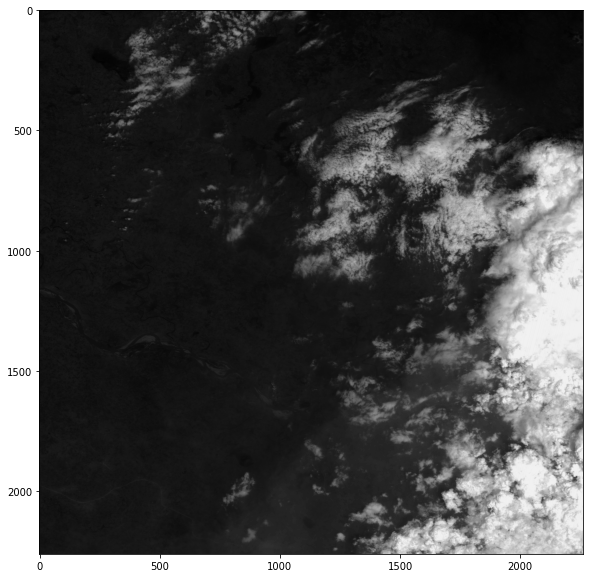

In [29]:
plt.figure(figsize = (10,10))
plt.imshow(data, cmap='gray')

In [30]:
plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

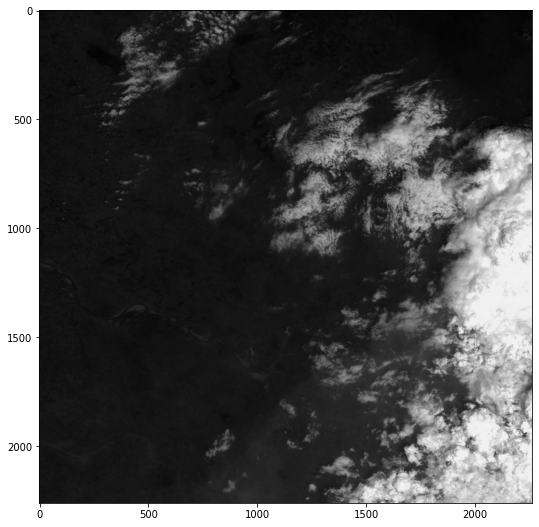

In [31]:
plt.figure(figsize = (30,30))
for i in range(1,ds.RasterCount+1):
    band=ds.GetRasterBand(i)
    plt.subplot(1,3,i)
    plt.imshow(band.ReadAsArray(),cmap='gray')


In [32]:
plt.close()

# Visualise MultiBand Raster

In [33]:
file_name = r'HARV_Ortho_wNA.tif' #Multiband image 
ds1 = gdal.Open(file_name)
multi_data = ds1.ReadAsArray()

In [34]:
multi_data.shape

(3, 2317, 3073)

In [35]:
reshaped_data = np.stack((multi_data[0], multi_data[1], multi_data[2]), axis = -1) #

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


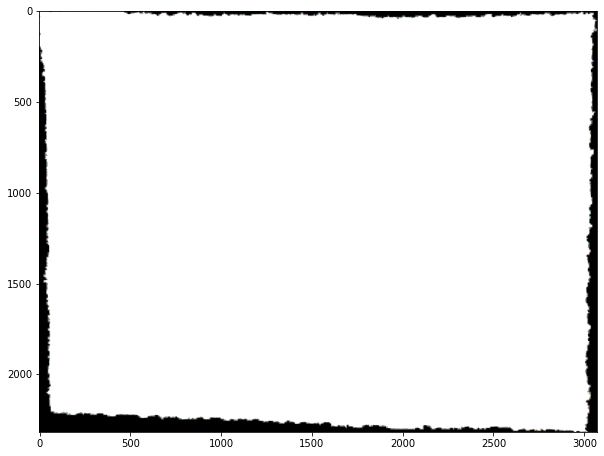

In [36]:
plt.figure(figsize =(10,10))
plt.imshow(reshaped_data)

In [37]:
del ds1

# Reading Partial Data Set

In [38]:
band = ds.GetRasterBand(1)

In [39]:
data = band.ReadAsArray(xoff=600, yoff=600, win_xsize=512, win_ysize=512)

In [40]:
data.shape

(512, 512)

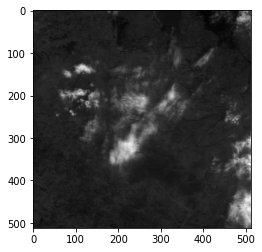

In [41]:
plt.imshow(data, cmap='gray')

In [42]:
del data
del ds

# Reading Raster BLockwise

Rasters are made up of Blocks corrersponds to a rectangular subpart of the raster. The first value is the width of the block and the second value its height. Knowing the block size is important when efficient reading of a raster is needed. 

In [43]:
ds = gdal.Open(file_name)

In [44]:
band=ds.GetRasterBand(1)

In [45]:
x_size = ds.RasterXSize
y_size = ds.RasterYSize

In [46]:
block_size_x, block_size_y= band.GetBlockSize()

In [47]:
block_size_x, block_size_y

(3073, 1)

In [48]:
# Reading data block by block
for x in range(0, x_size, block_size_x):
    if x+block_size_x < x_size:
        columns = block_size_x
    else:
        columns = x_size-x
    for y in range(0, y_size, block_size_y):
        if y+block_size_y < y_size:
            rows=block_size_y
        else:
            rows = y_size - y
    data = band.ReadAsArray(x,y,columns,rows)
    data = data*5
    #print(data)

In [49]:
data

array([[-49995., -49995., -49995., ..., -49995., -49995., -49995.]])

In [50]:
data.shape

(1, 3073)

# Reading HDF File

Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of scientific data.

# Subdatasets

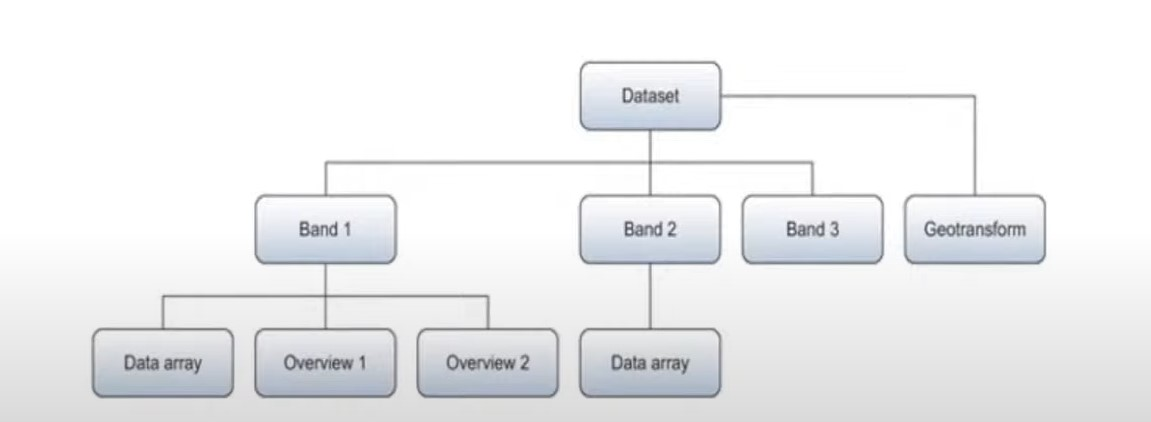

In [51]:
import os
os.chdir(r'G:\iirs\new set')

In [52]:
hdf_file = 'MOD11A1.A2019001.h24v05.061.2021365202750.hdf' # file name

In [53]:
ds = gdal.Open(hdf_file)

In [54]:
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000204825D1240> >

In [55]:
sds = ds.GetSubDatasets()

In [56]:
len(sds)

12

In [57]:
type(sds)

list

In [58]:
type(sds[0])

tuple

In [59]:
for sd, description in sds:
    print(description)

[1200x1200] LST_Day_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)
[1200x1200] QC_Day MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] Day_view_time MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] Day_view_angl MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] LST_Night_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)
[1200x1200] QC_Night MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] Night_view_time MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] Night_view_angl MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] Emis_31 MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] Emis_32 MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
[1200x1200] Clear_day_cov MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)
[1200x1200] Clear_night_cov MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)


In [60]:
print(sds[0])

('HDF4_EOS:EOS_GRID:"MOD11A1.A2019001.h24v05.061.2021365202750.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km', '[1200x1200] LST_Day_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)')


In [61]:
data =gdal.Open(sds[0][0]) # or data =gdal.Open(sds[4][0]) for night

In [62]:
type(data)

osgeo.gdal.Dataset

In [63]:
data.GetProjection

<bound method Dataset.GetProjection of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000204825DC3C0> >>

In [64]:
lst_day = data.ReadAsArray() #lst_night = data.GetRasterBand(1).ReadAsArray()

In [65]:
#lst_night = lst_night*0.02 -273

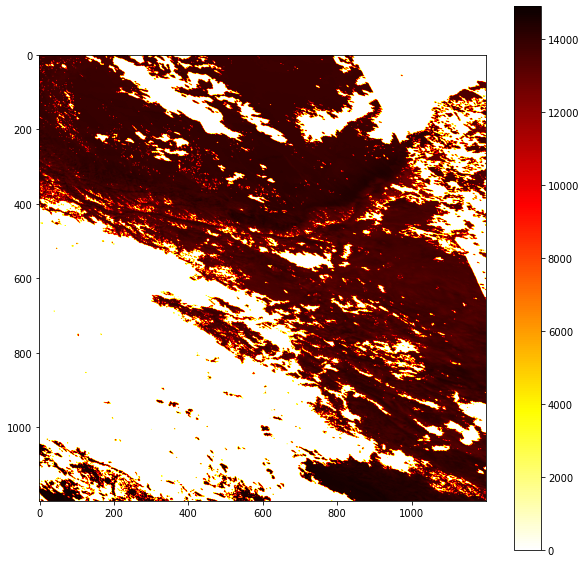

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(lst_day, cmap='hot_r')
plt.colorbar()

In [67]:
import pprint
pp = pprint.PrettyPrinter(compact=True)
pp.pprint(data.GetMetadata())

{'ALGORITHMPACKAGEACCEPTANCEDATE': '102004',
 'ALGORITHMPACKAGEMATURITYCODE': 'Normal',
 'ALGORITHMPACKAGENAME': 'MOD_PR11A',
 'ALGORITHMPACKAGEVERSION': '6',
 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Terra',
 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS',
 'AUTOMATICQUALITYFLAG.1': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION.1': 'No automatic quality assessment is '
                                      'performed in the PGE.',
 'CLOUD_CONTAMINATED_LST_SCREENED': 'YES',
 'DAYNIGHTFLAG': 'Both',
 'DESCRREVISION': '6.1',
 'EASTBOUNDINGCOORDINATE': '91.3730649715362',
 'EXCLUSIONGRINGFLAG.1': 'N',
 'GRINGPOINTLATITUDE.1': '39.9958333333333, 39.9958333333333, '
                         '30.0041666666667, 30.0041666666667',
 'GRINGPOINTLONGITUDE.1': '78.3190134083678, 91.3730649715362, '
                          '80.8310087331874, 69.2830523930319',
 'GRINGPOINTSEQUENCENO.1': '1, 2, 3, 4',
 'HDFEOSVersion': 'HDFEOS_V2.19',
 'HORIZONTALTILENUMBER': '24',
 'IN

In [68]:
plt.close()
del ds

# Reading netCDF File 

## About Data

This data is download from Meteorological & Oceanographic Satellite Data Archival centre Space Application Centre,ISRO.
This is experimental 24 hour,48 hour forecast for India using mesoscale Weather Research and Forecasting(WRF) model.

Following six surface parameters are displayed:

`Cloud: Range: (0.0-0.25) - Clear Sky, (0.26-0.75)- Patial Cloudy, (0.76-1.0)- Cloudy
Humidity: is in percentage
Rain: is last 24 hour accumulated rain and is in mm.
Range: (0.0-0.4)- No Rain,(0.5-7.5)- Light,(7.6-64.4)- Moderate, (64.4+)- Heavy
Temperature:is in celcius.
Wind Direction: is in degree and follows meterological convention.0 degree correspond to Northerly wind.
Wind Speed: is in m/s.`

The dataset is available at **https://www.mosdac.gov.in/gallery-forecast** .

Go to `Data Access`-> `Forecast`.
Login will be required to get the data set.
**https://www.mosdac.gov.in/forecast-data/WRF_SAC/**

In [69]:
import os
os.chdir(r'G:\iirs\netcdf')

In [70]:
nc_file='SAC_WRF_FCST_5KM_20220122.nc'

ds=gdal.Open(nc_file)

In [71]:
pp.pprint(ds.GetMetadata())

{'NC_GLOBAL#CDI': 'Climate Data Interface version 1.7.0 '
                  '(http://mpimet.mpg.de/cdi)',
 'NC_GLOBAL#CDO': 'Climate Data Operators version 1.7.0 '
                  '(http://mpimet.mpg.de/cdo)',
 'NC_GLOBAL#Conventions': 'CF-1.4',
 'NC_GLOBAL#history': 'Sat Jan 22 21:01:28 2022: cdo '
                      'select,name=t2,psfc,rainc,rainnc,clflo,clfmi,clfhi,rh2,ws10,wd10,swdown '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/SAC_WRF_FCST_5KM_20220122.nc\n'
                      'Sat Jan 22 21:00:01 2022: cdo -f nc import_binary '
                      '/prod/wrfguest/OPER_WRF/WRF_OUT/20220122/D2.ctl '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc'}


In [72]:
sds=ds.GetSubDatasets()

In [73]:
for sd,description in sds:
    print(description)

[25x1x900x900] t2 (32-bit floating-point)
[25x1x900x900] psfc (32-bit floating-point)
[25x1x900x900] rainc (32-bit floating-point)
[25x1x900x900] rainnc (32-bit floating-point)
[25x1x900x900] swdown (32-bit floating-point)
[25x1x900x900] clflo (32-bit floating-point)
[25x1x900x900] clfmi (32-bit floating-point)
[25x1x900x900] clfhi (32-bit floating-point)
[25x1x900x900] rh2 (32-bit floating-point)
[25x1x900x900] ws10 (32-bit floating-point)
[25x1x900x900] wd10 (32-bit floating-point)


In [74]:
temp_ds = gdal.Open(sds[0][0])
temp_ds.RasterCount

25

In [75]:
pp.pprint(temp_ds.GetMetadata())

{'NC_GLOBAL#CDI': 'Climate Data Interface version 1.7.0 '
                  '(http://mpimet.mpg.de/cdi)',
 'NC_GLOBAL#CDO': 'Climate Data Operators version 1.7.0 '
                  '(http://mpimet.mpg.de/cdo)',
 'NC_GLOBAL#Conventions': 'CF-1.4',
 'NC_GLOBAL#history': 'Sat Jan 22 21:01:28 2022: cdo '
                      'select,name=t2,psfc,rainc,rainnc,clflo,clfmi,clfhi,rh2,ws10,wd10,swdown '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/SAC_WRF_FCST_5KM_20220122.nc\n'
                      'Sat Jan 22 21:00:01 2022: cdo -f nc import_binary '
                      '/prod/wrfguest/OPER_WRF/WRF_OUT/20220122/D2.ctl '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc',
 'NETCDF_DIM_EXTRA': '{time,lev_2}',
 'NETCDF_DIM_lev_2_DEF': '{1,6}',
 'NETCDF_DIM_lev_2_VALUES': '1000',
 'NETCDF_DIM_time_DEF': '{25,6}',
 'NETCDF_DIM_time_VALUES': '{0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72}'

In [76]:
temp_data = temp_ds.ReadAsArray()

In [77]:
temp_data = temp_data-273

In [78]:
print(temp_data.dtype)

float32


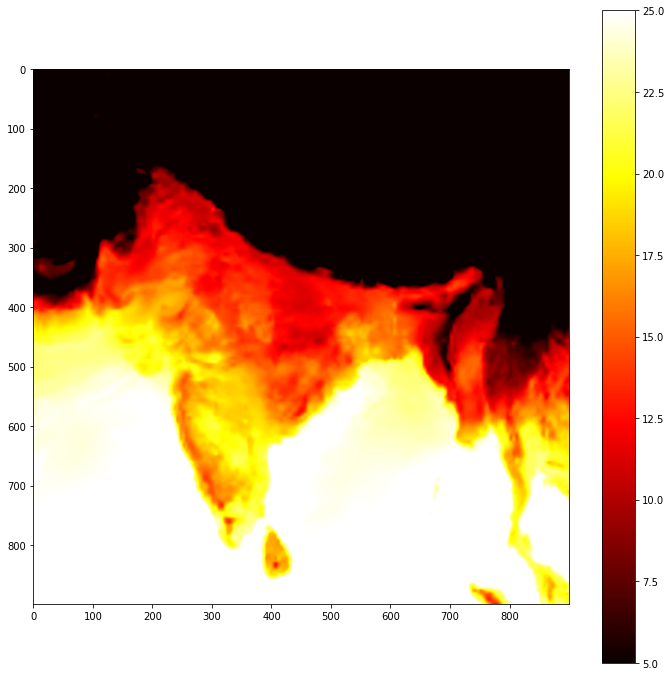

In [79]:
plt.figure(figsize=(12,12))
plt.imshow(temp_data[0],cmap='hot',clim=(5,25))
plt.colorbar()

In [80]:
plt.close()

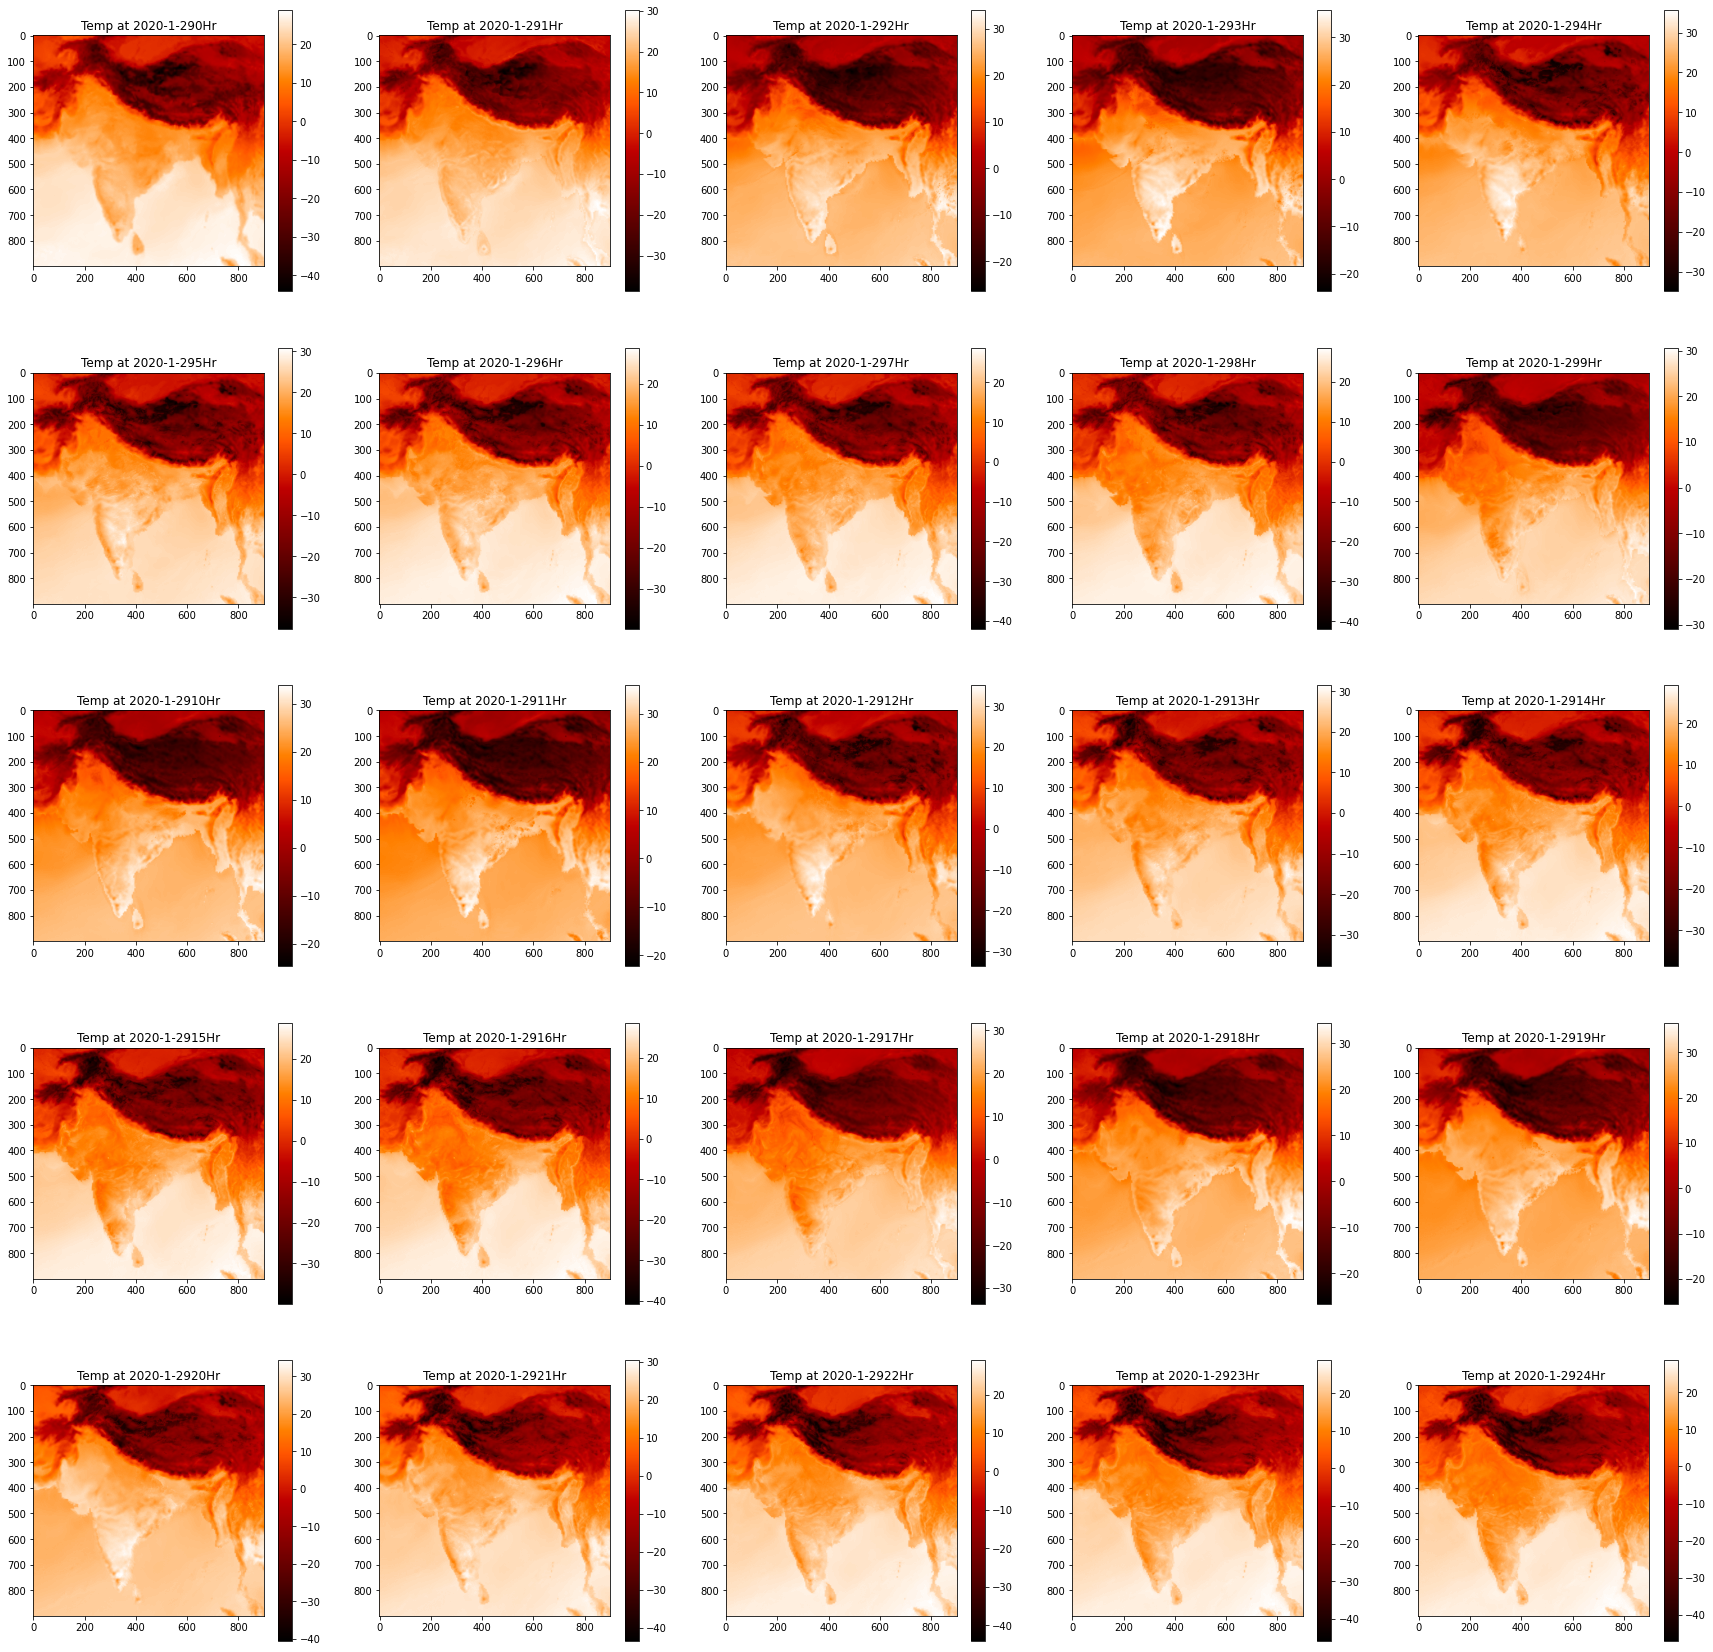

In [81]:
plt.figure(figsize=(30,30))
for i in range(temp_ds.RasterCount):
    plt.subplot(5,5,i+1)
    plt.imshow(temp_data[i], cmap='gist_heat')
    plt.colorbar()
    plt.title('Temp at 2020-1-29{hour}Hr'.format(hour=i))

In [82]:
for sd,description in sds:
    print(description)

[25x1x900x900] t2 (32-bit floating-point)
[25x1x900x900] psfc (32-bit floating-point)
[25x1x900x900] rainc (32-bit floating-point)
[25x1x900x900] rainnc (32-bit floating-point)
[25x1x900x900] swdown (32-bit floating-point)
[25x1x900x900] clflo (32-bit floating-point)
[25x1x900x900] clfmi (32-bit floating-point)
[25x1x900x900] clfhi (32-bit floating-point)
[25x1x900x900] rh2 (32-bit floating-point)
[25x1x900x900] ws10 (32-bit floating-point)
[25x1x900x900] wd10 (32-bit floating-point)


In [83]:
wind_speed = gdal.Open(sds[9][0])

In [84]:
pp.pprint(wind_speed.GetMetadata())

{'NC_GLOBAL#CDI': 'Climate Data Interface version 1.7.0 '
                  '(http://mpimet.mpg.de/cdi)',
 'NC_GLOBAL#CDO': 'Climate Data Operators version 1.7.0 '
                  '(http://mpimet.mpg.de/cdo)',
 'NC_GLOBAL#Conventions': 'CF-1.4',
 'NC_GLOBAL#history': 'Sat Jan 22 21:01:28 2022: cdo '
                      'select,name=t2,psfc,rainc,rainnc,clflo,clfmi,clfhi,rh2,ws10,wd10,swdown '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/SAC_WRF_FCST_5KM_20220122.nc\n'
                      'Sat Jan 22 21:00:01 2022: cdo -f nc import_binary '
                      '/prod/wrfguest/OPER_WRF/WRF_OUT/20220122/D2.ctl '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc',
 'NETCDF_DIM_EXTRA': '{time,lev_2}',
 'NETCDF_DIM_lev_2_DEF': '{1,6}',
 'NETCDF_DIM_lev_2_VALUES': '1000',
 'NETCDF_DIM_time_DEF': '{25,6}',
 'NETCDF_DIM_time_VALUES': '{0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72}'

In [85]:
wind_dir = gdal.Open(sds[10][0])
pp.pprint(wind_dir.GetMetadata())

{'NC_GLOBAL#CDI': 'Climate Data Interface version 1.7.0 '
                  '(http://mpimet.mpg.de/cdi)',
 'NC_GLOBAL#CDO': 'Climate Data Operators version 1.7.0 '
                  '(http://mpimet.mpg.de/cdo)',
 'NC_GLOBAL#Conventions': 'CF-1.4',
 'NC_GLOBAL#history': 'Sat Jan 22 21:01:28 2022: cdo '
                      'select,name=t2,psfc,rainc,rainnc,clflo,clfmi,clfhi,rh2,ws10,wd10,swdown '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/SAC_WRF_FCST_5KM_20220122.nc\n'
                      'Sat Jan 22 21:00:01 2022: cdo -f nc import_binary '
                      '/prod/wrfguest/OPER_WRF/WRF_OUT/20220122/D2.ctl '
                      '/prod/wrfguest/OPER_WRF/SCRIPT/D2.nc',
 'NETCDF_DIM_EXTRA': '{time,lev_2}',
 'NETCDF_DIM_lev_2_DEF': '{1,6}',
 'NETCDF_DIM_lev_2_VALUES': '1000',
 'NETCDF_DIM_time_DEF': '{25,6}',
 'NETCDF_DIM_time_VALUES': '{0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72}'

In [86]:
wind_speed_data= wind_speed.ReadAsArray()
wind_dir_data= wind_dir.ReadAsArray()

In [87]:
wd_rad = wind_dir_data*np.pi / 180

In [88]:
wx = wind_speed_data*np.cos(wd_rad)

In [89]:
wy = wind_speed_data*np.sin(wd_rad)

(-9.078102111816406,
 20.984088897705078,
 -13.442549705505371,
 9.096898078918457)

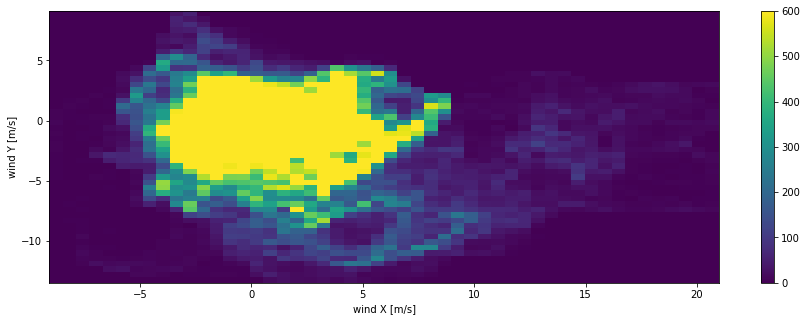

In [90]:
 
plt.figure(figsize=(15,5))
plt.hist2d(wx[0].ravel(), wy[0].ravel(), bins=(50,50), vmax=600) # At time t = 0
plt.colorbar()
plt.xlabel('wind X [m/s]')
plt.ylabel('wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

(-16.9101505279541, 21.57524299621582, -18.600351333618164, 11.516356468200684)

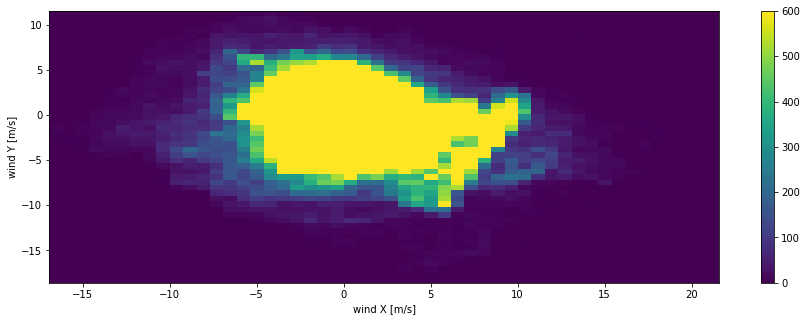

In [91]:
 
plt.figure(figsize=(15,5))
plt.hist2d(wx[5].ravel(), wy[5].ravel(), bins=(50,50), vmax=600) # At time t = 5
plt.colorbar()
plt.xlabel('wind X [m/s]')
plt.ylabel('wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [92]:
plt.close()

# WMS - Web Map Services

The Gdal WMS driver has support for several internal 'minidrivers',which allow access to different web mapping service.

In [93]:
data_str = '''<GDAL_WMS > 
    <Service name="TMS">
        <ServerUrl>https://gibs.earthdata.nasa.gov/wms/epsg4326/best/MODIS_Aqua_CorrectedReflectance_TrueColor/default/2022-01-01/250m/${z}/${y}/${x}.jpg</ServerUrl>
    </Service>
    <DataWindow>
        <UpperLeftX>-180.0</UpperLeftX> 
        <UpperLeftY>98</UpperLeftY> 
        <LowerRightX>396.0</LowerRightX> 
        <LowerRightY>-198</LowerRightY> 
        <TileLevel>8</TileLevel> 
        <TileCountX>2</TileCountX> 
        <TileCountY>1</TileCountY>
        <YOrigin>top</YOrigin>
    </DataWindow>
    <Projection>EPSG:4326</Projection> 
    <BlockSizeX>512</BlockSizeX> 
    <BlockSizeY>512</BlockSizeY>
    <Bands Count>3</BandsCount> 
</GDAL_WMS>'''

In [94]:
data_str

'<GDAL_WMS > \n    <Service name="TMS">\n        <ServerUrl>https://gibs.earthdata.nasa.gov/wms/epsg4326/best/MODIS_Aqua_CorrectedReflectance_TrueColor/default/2022-01-01/250m/${z}/${y}/${x}.jpg</ServerUrl>\n    </Service>\n    <DataWindow>\n        <UpperLeftX>-180.0</UpperLeftX> \n        <UpperLeftY>98</UpperLeftY> \n        <LowerRightX>396.0</LowerRightX> \n        <LowerRightY>-198</LowerRightY> \n        <TileLevel>8</TileLevel> \n        <TileCountX>2</TileCountX> \n        <TileCountY>1</TileCountY>\n        <YOrigin>top</YOrigin>\n    </DataWindow>\n    <Projection>EPSG:4326</Projection> \n    <BlockSizeX>512</BlockSizeX> \n    <BlockSizeY>512</BlockSizeY>\n    <Bands Count>3</BandsCount> \n</GDAL_WMS>'

In [95]:
#f = open('abcd.xml','w')

with open('abcd.xml','w') as f:
    f.write(data_str)

In [96]:
ds = gdal.Open('abcd.xml')

In [97]:
type(ds)

NoneType

In [98]:
type(ds)

NoneType

In [99]:
img_extents = [70.5, 37, 88.5, 23.5]

In [100]:
#vrt_ds = gdal.Translate('lib.tif', ds , width=512, height=512, projWin = img_extents, noData= 0)

In [101]:
#data = vrt_ds.ReadAsArray()

In [102]:
#reshaped_data = np.stack((data[0], data[1], data[2]), axis= -1)
#plt.figure(figsize=(12,12))
#plt.imshow(reshaped_data)

# Raster Data Projecessing

# Writing a Single Band Raster CreateCopy Method

There are two general techniques for creating files, using CreateCopy() and Create(). The CreateCopy method involves calling the CreateCopy() method on the format driver, and passing in a source dataset that should be copied. The Create method involves calling the Create() method on the driver, and then explicilty writing all the metadata, and raster data with separate calls. htts://gdal.org/drivers/raster/index.html

In [103]:
fileformat= "GTiff"

In [104]:
driver = gdal.GetDriverByName(fileformat)

In [105]:
print(driver.ShortName)

GTiff


In [106]:
print(driver.LongName)

GeoTIFF


In [107]:
metadata = driver.GetMetadata()

In [108]:
for key,value in metadata.items():
    print(key,": " ,value)

DCAP_CREATE :  YES
DCAP_CREATECOPY :  YES
DCAP_OPEN :  YES
DCAP_RASTER :  YES
DCAP_VIRTUALIO :  YES
DMD_CREATIONDATATYPES :  Byte UInt16 Int16 UInt32 Int32 Float32 Float64 CInt16 CInt32 CFloat32 CFloat64
DMD_CREATIONOPTIONLIST :  <CreationOptionList>   <Option name='COMPRESS' type='string-select'>       <Value>NONE</Value>       <Value>LZW</Value>       <Value>PACKBITS</Value>       <Value>JPEG</Value>       <Value>CCITTRLE</Value>       <Value>CCITTFAX3</Value>       <Value>CCITTFAX4</Value>       <Value>DEFLATE</Value>       <Value>LZMA</Value>       <Value>ZSTD</Value>       <Value>WEBP</Value>       <Value>LERC</Value>       <Value>LERC_DEFLATE</Value>       <Value>LERC_ZSTD</Value>   </Option>   <Option name='PREDICTOR' type='int' description='Predictor Type (1=default, 2=horizontal differencing, 3=floating point prediction)'/>   <Option name='DISCARD_LSB' type='string' description='Number of least-significant bits to set to clear as a single value or comma-separated list of value

# Using CreateCopy()

The `GDALDriver::CreateCopy()` method is fairly simply as most information is collected from the source dataset.

In [109]:
import os
os.chdir(r'G:\iirs\bhuvan')

In [110]:
src_file = 'image2.tif' #file name

In [111]:
dst_filename = r'op_raster.tif'#destination file file name

In [112]:
src_ds = gdal.Open(src_file)

In [113]:
driver = gdal.GetDriverByName('GTiff')

In [114]:
dst_ds = driver.CreateCopy(dst_filename, src_ds)

In [115]:
data = src_ds.ReadAsArray()

In [116]:
inv_data = np.invert(data)

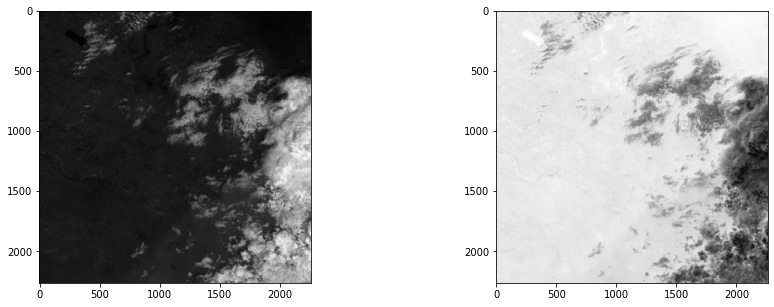

In [117]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(data, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(inv_data, cmap='gray')

In [118]:
out_band = dst_ds.GetRasterBand(1)

In [119]:
out_band.WriteArray(inv_data)

0

In [120]:
out_band.FlushCache()

In [121]:
del dst_ds

In [122]:
ds = gdal.Open(dst_filename) #file name

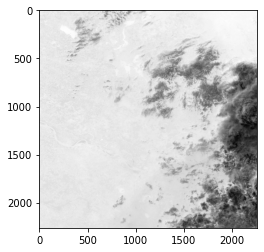

In [123]:
plt.imshow(ds.ReadAsArray(), cmap='gray')

# Writing Single Band RAster Create Method

For situations in which we are not just exporting an existing file to a new file, it is generally necessary to use the `GDALDriver::Create()` method. To the Create() method image size, number of bands and band type must be provided explicitly.

1. A csv file containing daily Gridded Rainfall Data Set Over India.
2. The first data in the record is at 6.5N & 66.5E, the second is at 6.5N & 6.75E, and so on
3. The second row 6.75& 66.5E, the second is at 6.75N & 66.75E.
4. The last data record corresponds to 38.5N & 100.0E
5. Latitude: 6.5N 100.0E .25
7. Rows and Columns: 129*135

In [124]:
src_txt_file =r'rainfalldata.csv'

In [125]:
dst_filename = 'op_raster2.tif'

In [126]:
driver = gdal.GetDriverByName('GTiff')

In [127]:
dst_ds = driver.Create(dst_filename, xsize=140, ysize=135, bands=1, eType=gdal.GDT_Int16)

In [128]:
data = np.loadtxt(src_txt_file, delimiter=',', encoding = 'utf-8' ,dtype=np.float32 )

In [129]:
data.shape

(135, 129)

In [130]:
band = dst_ds.GetRasterBand(1)

# Adding Metadata with band

In [131]:
from datetime import datetime

In [132]:
band_meta= {'Date of Creation':str(datetime.now()), 'scale_factor':'1'}

In [133]:
band.SetMetadata(band_meta)

0

# Adding Nodata with band

In [134]:
band.SetNoDataValue(-999)

0

In [135]:
band.WriteArray(data)

0

# Adding Metadata to dataset

In [136]:
ds_meta= {'Date of Creation':str(datetime.now()), 'organsiation':'1', 'Processing Level':'L3'}

In [137]:
dst_ds.SetMetadata(ds_meta)

0

In [138]:
dst_ds.FlushCache()

In [139]:
dst_ds = None

In [140]:
ds = gdal.Open(dst_filename)

In [141]:
ds.GetMetadata()

{'Date of Creation': '2022-03-12 16:31:03.761529',
 'organsiation': '1',
 'Processing Level': 'L3'}

In [142]:
ds.GetRasterBand(1).GetMetadata()

{'Date of Creation': '2022-03-12 16:31:03.697539', 'scale_factor': '1'}

In [143]:
ds.GetRasterBand(1).GetNoDataValue()

-999.0

In [144]:
ds = None

# Writing a Georeferenced Raster

In [145]:
from osgeo import osr

In [146]:
crs = osr.SpatialReference()

In [147]:
crs.SetWellKnownGeogCS('WGS84')

0

In [148]:
crs.ExportToWkt()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [149]:
trf = [66.375, 0.25, 0.0, 38.625, 0.0, -0.25]

In [150]:
src_txt_file = 'rainfalldata.csv'
dst_filename = 'op_raster2.img'

In [151]:
driver =gdal.GetDriverByName('HFA')

In [152]:
dst_ds = driver.Create(dst_filename, xsize=140, ysize=135, bands=1, eType=gdal.GDT_Int16)

In [153]:
dst_ds.SetProjection(crs.ExportToWkt())

0

In [154]:
dst_ds.SetGeoTransform(trf)

0

In [155]:
band = dst_ds.GetRasterBand(1)

In [156]:
band.SetNoDataValue(-999)

0

In [157]:
data = np.loadtxt(src_txt_file, delimiter = ',', dtype=np.int16)

In [158]:
data.shape

(135, 129)

In [159]:
band.WriteArray(data)

0

In [160]:
dst_ds.FlushCache()

In [161]:
dst_ds.GetGeoTransform()

(66.375, 0.25, 0.0, 38.625, 0.0, -0.25)

In [162]:
dst_ds = None

# Read and Confirm

In [163]:
ds = gdal.Open(dst_filename)

In [164]:
ds.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [165]:
!gdalinfo -stats op_raster2.img

Driver: HFA/Erdas Imagine Images (.img)
Files: op_raster2.img
Size is 140, 135
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (66.375000000000000,38.625000000000000)
Pixel Size = (0.250000000000000,-0.250000000000000)
Corner Coordinates:
Upper Left  (  66.3750000,  38.6250000) ( 66d22'30.00"E, 38d37'30.00"N)
Lower Left  (  66.3750000,   4.8750000) ( 66d22'30.00"E,  4d52'30.00"N)
Upper Right ( 101.3750000,  38.6250000) (101d22'30.00"E, 38d37'30.00"N)
Lower Right ( 101.3750000,   4.8750000) (101d22'30.

In [166]:
ds.GetGeoTransform()

(66.375, 0.25, 0.0, 38.625, 0.0, -0.25)

In [167]:
data = ds.ReadAsArray()

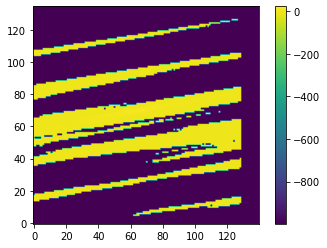

In [168]:
plt.imshow(data, origin='lower')
plt.colorbar()

In [169]:
del ds